In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [ ]:
data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.coef_)

[ 8.82000705e-01  7.40143446e-01 -6.23514690e-01 -1.14306384e-08]


In [ ]:
print(regressor.intercept_)

-0.02415198975364774


In [ ]:
predicted = regressor.predict(X_test)

In [ ]:
print(predicted)

[ 29.79325269 235.28583478 364.63699319  24.96496935 247.81602835
 337.24496418 221.91253707 204.78394408 211.48694208 295.26910433
 381.80408679  35.00728995 369.02345057  30.97371213 278.87630306
 256.9967241   25.90031616  37.65971688 181.16509206  31.40798897
 252.27428919 286.06423329  32.36446418  21.35945459  16.80086112
 341.10141833 232.50250486  33.89064145 292.13884102  23.11594754
  30.35951966 341.93035234 354.76227375 247.53900917  29.55112806
 251.29513505 203.69159911 318.63238407 261.97374719  37.21529283
  34.05817311 197.51529097 413.76452453  25.0519831   16.78354601
  26.05099965  32.16660227 202.81990272 189.58768178  34.85439954
 253.17564522 250.28715986 227.2793829  247.97106389 336.60468152
 211.61845639 245.32072412 208.37133354 205.86069494  31.11842162
 178.59538054 326.75841113 307.76032081  29.47196817 274.85280057
 209.12277515  34.00546926 146.15722256  24.02344158 300.44272766
 313.54454405  32.06737382  83.22023411 188.69398117 228.32602299
 199.49759

In [ ]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [ ]:
data1.head(20)

,Actual,Predicted
0,29.940001,29.793253
1,235.839996,235.285835
2,362.750000,364.636993
3,24.740000,24.964969
4,250.029999,247.816028
5,334.850006,337.244964
6,222.600006,221.912537
7,203.759995,204.783944
8,209.600006,211.486942
9,294.790009,295.269104


In [ ]:
graph = data1.head(20)

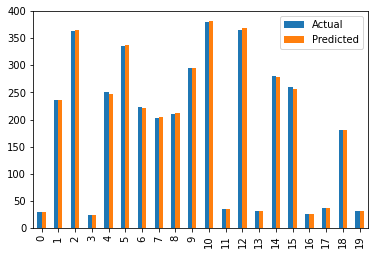

In [ ]:
graph.plot(kind='bar')

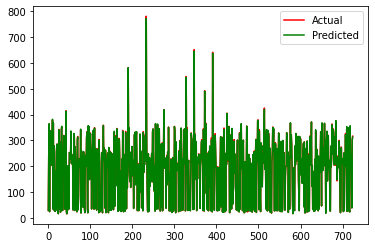

In [ ]:
plt.plot(data1['Actual'],c='red',label='Actual')
plt.plot(data1['Predicted'],c='green',label='Predicted')
plt.legend()

In [ ]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.441108699200798
Mean Squared Error: 4.410972416634512
Root Mean Squared Error: 2.100231515008408


In [ ]:
#calculate RMSE
pred = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, predicted))

2.100231515008408

In [ ]:
################## R square value is 0.9999 before implement of PCA ################

regressor.score(X_test,y_test)

0.9996999373864549

In [ ]:
#Data Standardisation
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit(X)
X_std = X_scaled.transform(X)

In [ ]:
X_std

array([[-1.36164384, -1.41549105, -1.40900745,  2.64571262],
       [-1.31680128, -1.3661901 , -1.35181192,  2.32903512],
       [-1.35403219, -1.39212445, -1.35846649,  0.53061896],
       ...,
       [ 3.81659683,  3.72396373,  3.75813192,  4.69902289],
       [ 3.83413668,  3.84824343,  3.82198214,  2.0346967 ],
       [ 4.93567537,  4.19917046,  4.10576966,  8.32046028]])

In [ ]:
X_std.shape

(2416, 4)

In [ ]:
cov_mat = np.cov(X_std.T)
print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[1.00041408 0.99980295 0.99983908 0.51315622]
 [0.99980295 1.00041408 0.99998891 0.49370073]
 [0.99983908 0.99998891 1.00041408 0.50196991]
 [0.51315622 0.49370073 0.50196991 1.00041408]]


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.54173311 -0.18824489 -0.67452355  0.46487319]
 [ 0.53970574 -0.21532484 -0.06552599 -0.81120853]
 [ 0.54058362 -0.20384756  0.73527953  0.35437202]
 [ 0.3507311   0.93629335  0.00939872 -0.01594102]]

Eigenvalues 
[3.32642267e+00 6.74415383e-01 4.91778940e-04 3.26483101e-04]


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.326422669376374
0.6744153832826763
0.0004917789396437246
0.00032648310109962756


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

Text(0, 0.5, 'Cumulative explained variance')

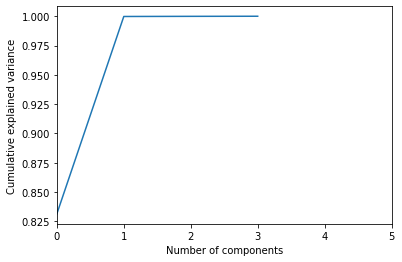

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,10)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scale(X))

In [ ]:
regr = LinearRegression()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [ ]:
#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

20.039547663544823

In [ ]:
################## R square value is 0.9725 after implement of PCA #################

regr.score(X_reduced_train[:,:1], y_train)

0.9725020695700577

In [ ]:
data2 = pd.DataFrame({'PCA_Actual': y_test.flatten(), 'Predicted' : pred.flatten()})

In [ ]:
data2.head(20)

,PCA_Actual,Predicted
0,207.729996,207.563328
1,28.280001,29.569047
2,24.010000,25.983811
3,315.230011,340.078983
4,200.240005,186.611849
5,210.240005,201.257793
6,26.440001,28.860505
7,22.790001,46.835343
8,224.839996,218.635849
9,353.179993,323.425184


In [ ]:
graph = data2.head(20)

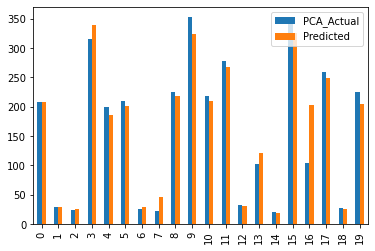

In [ ]:
graph.plot(kind='bar')

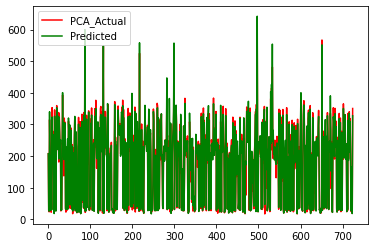

In [ ]:
plt.plot(data2['PCA_Actual'],c='red',label='PCA_Actual')
plt.plot(data2['Predicted'],c='green',label='Predicted')
plt.legend()